In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Aryan\Desktop\Data\SML\Daily Energy Used Dataset (Block-wise)\SUMS.csv")
df.head()

,Blocks,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0,8935.129999,11324.846750,36744.68701,1488415,7680.534210,541483.280,3851.421
1,1,5707.716500,7418.678597,27611.16400,1379264,5653.453131,354889.084,2348.056
2,2,5061.044500,6997.726300,27750.11900,1473126,5759.866828,334956.914,1929.238
3,3,6316.408000,8276.083952,30427.82400,1414024,6297.255196,395851.613,2478.500
4,4,6556.777500,8483.024968,29363.04000,1407522,6128.348046,405681.451,2684.672


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
Blocks           112 non-null int64
energy_median    112 non-null float64
energy_mean      112 non-null float64
energy_max       112 non-null float64
energy_count     112 non-null int64
energy_std       112 non-null float64
energy_sum       112 non-null float64
energy_min       112 non-null float64
dtypes: float64(6), int64(2)
memory usage: 7.1 KB


In [3]:
df.describe()

,Blocks,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,112.000000,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000,112.000000
mean,55.500000,4975.352629,6636.260044,26156.293588,1.498317e+06,5394.468140,317319.850955,1868.843911
std,32.475632,1192.032820,1481.033986,4373.972384,1.322542e+05,1020.064305,70894.997144,567.608477
min,0.000000,1559.030000,2379.997828,9111.283001,4.724810e+05,2128.945767,113728.640000,513.372000
25%,27.750000,4336.813500,5809.347295,24062.418743,1.437562e+06,4776.002910,277837.489250,1531.948000
50%,55.500000,4873.111501,6591.058335,25676.570500,1.520618e+06,5320.789785,315343.937500,1845.835000
75%,83.250000,5451.345125,7219.701575,27752.021000,1.567672e+06,5793.854293,345149.155000,2050.425000
max,111.000000,9939.104500,12426.204310,39658.598000,1.730525e+06,8338.317745,593858.709000,4277.796000


In [4]:
col = df.columns
col = list(col)
col.pop(0)

'Blocks'

# Blocks with relative Energy Consumption Measures

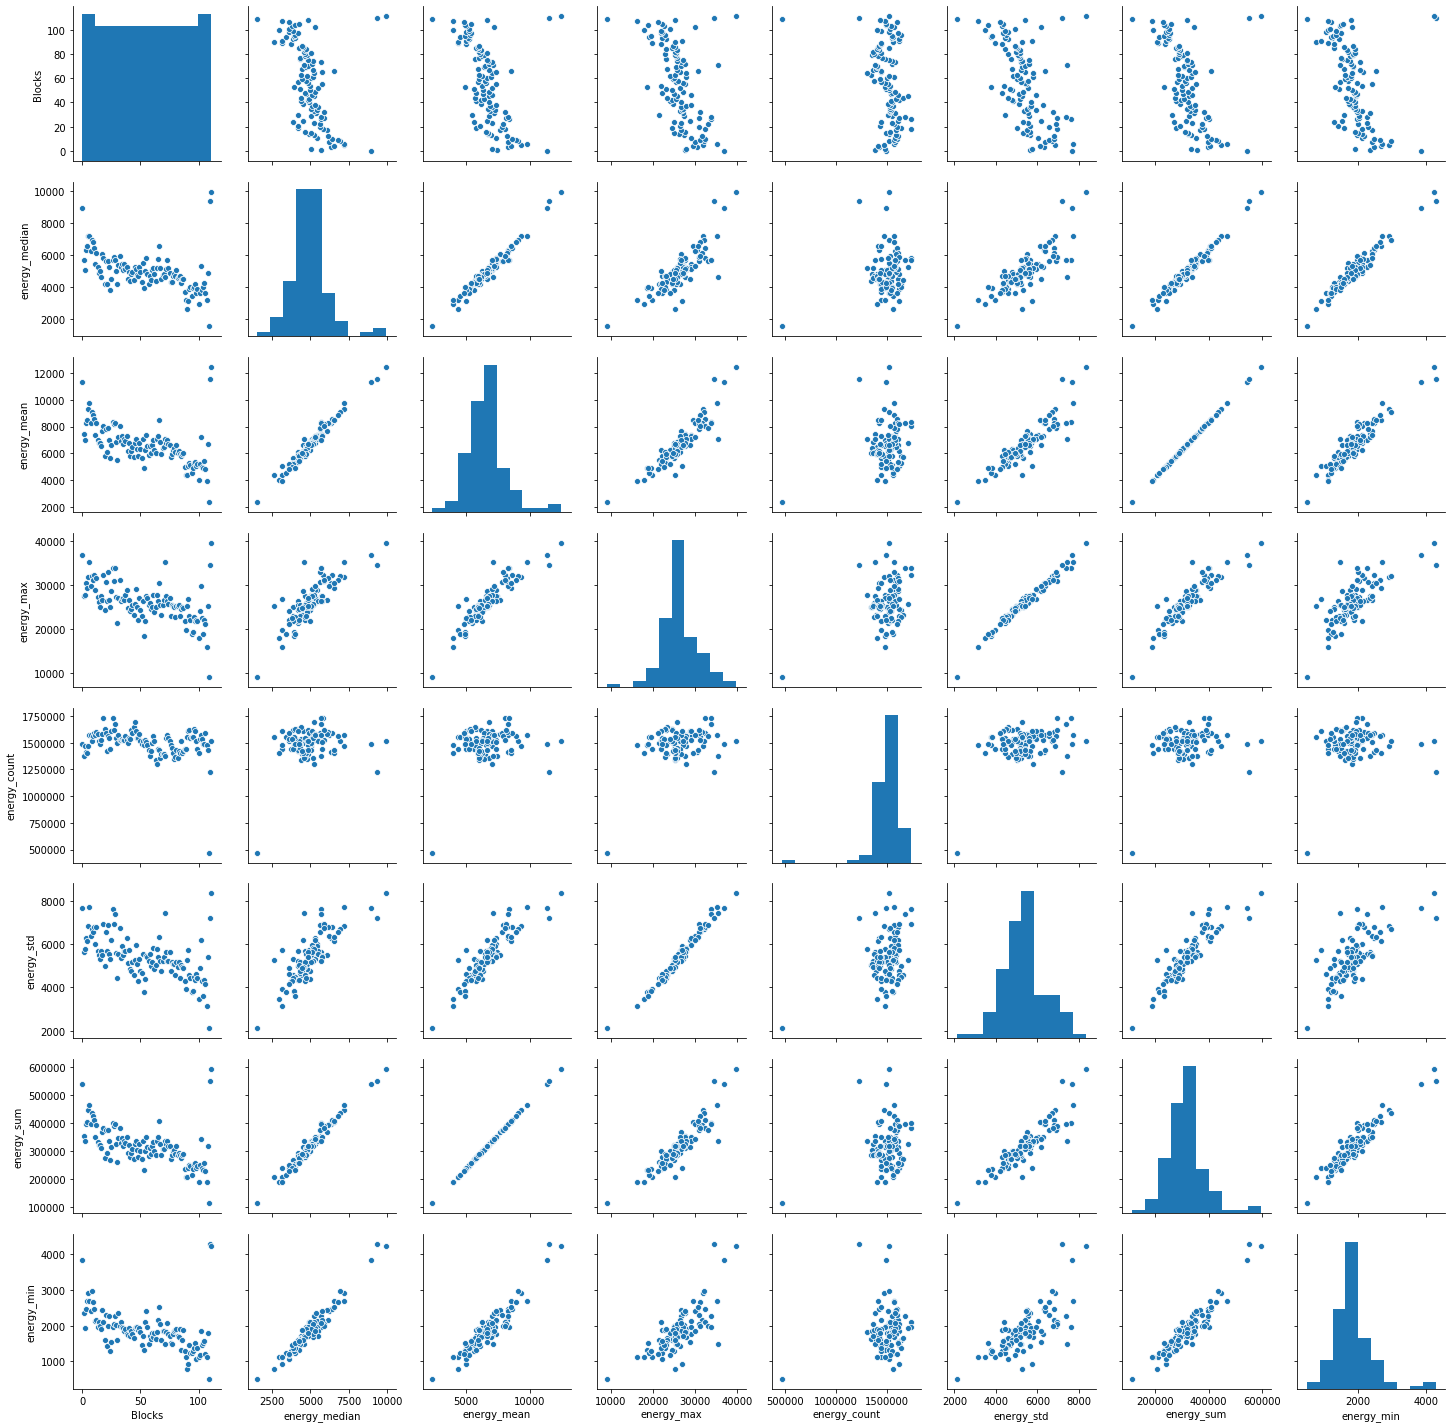

In [5]:
import seaborn as sns
sns.pairplot(df)

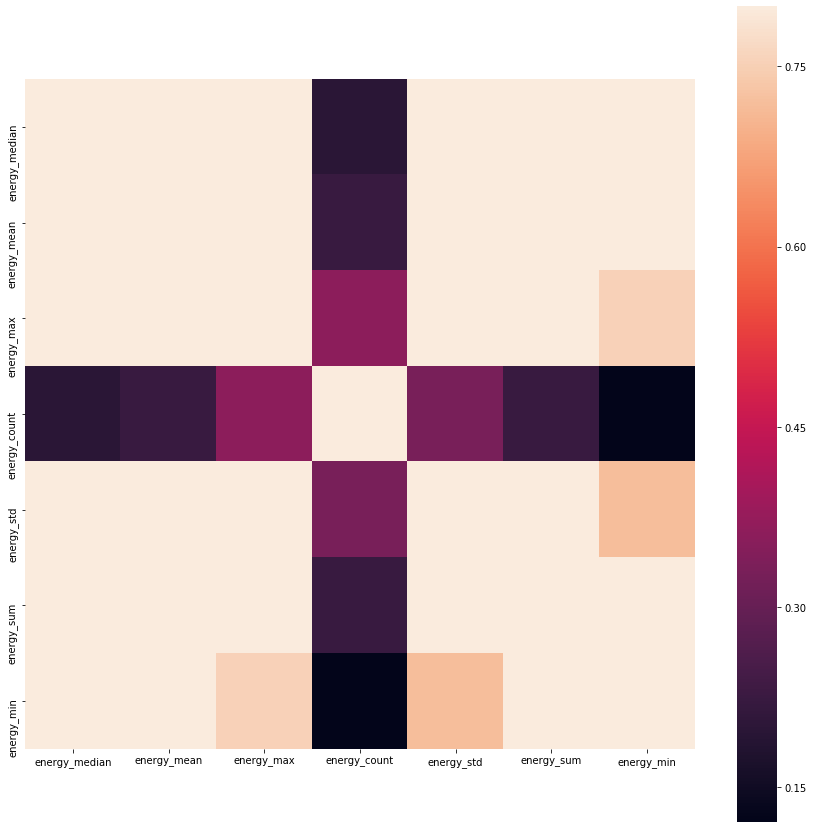

In [6]:
corr = df[col].corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

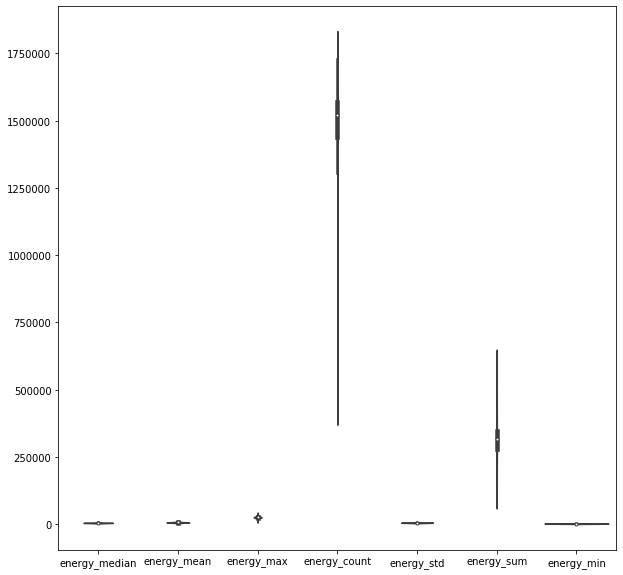

In [7]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df[col]);

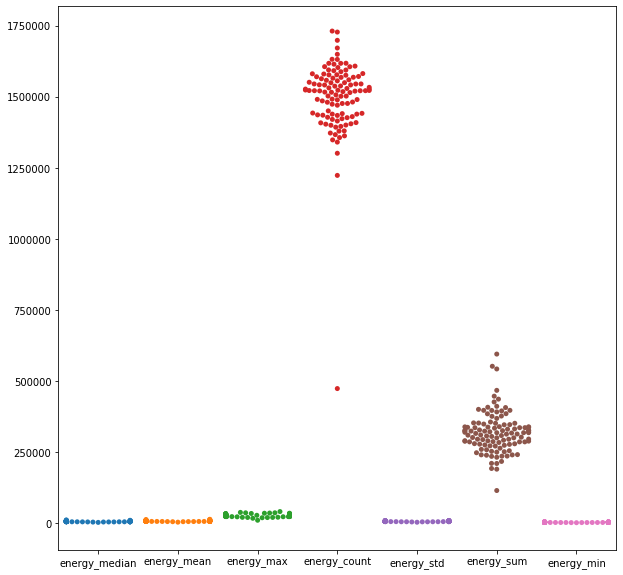

In [8]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=df[col]);

# Performing 

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage
l = ['complete','single','weighted','average','median','ward']

In [10]:
D = s(df)

C:\Users\Aryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


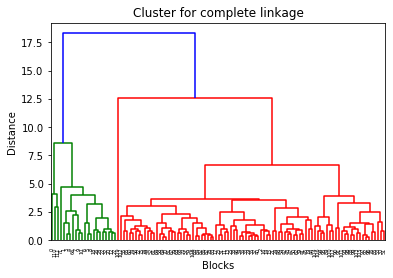

<Figure size 1440x720 with 0 Axes>

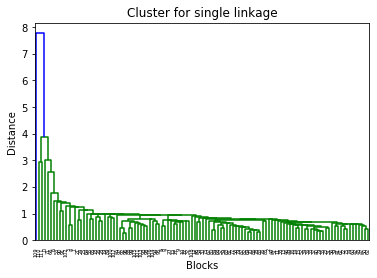

<Figure size 1440x720 with 0 Axes>

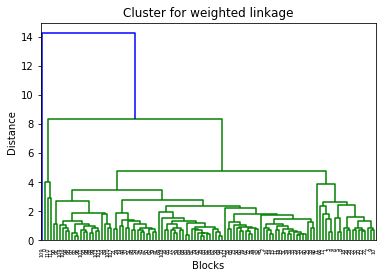

<Figure size 1440x720 with 0 Axes>

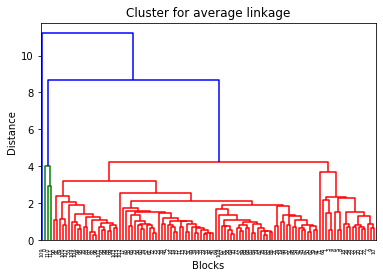

<Figure size 1440x720 with 0 Axes>

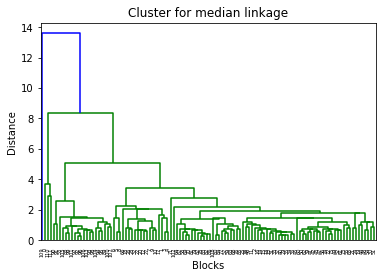

<Figure size 1440x720 with 0 Axes>

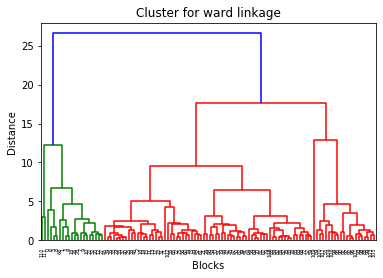

<Figure size 1440x720 with 0 Axes>

In [11]:
for i in l:
    Z = sch.linkage(D,method=i)
    den = sch.dendrogram(Z)
    plt.title('Cluster for '+i+' linkage')
    plt.xlabel('Blocks')
    plt.ylabel('Distance')
    plt.figure(figsize=(20,10))
    plt.show()
    print('\n')

# Determining Number of Clusters with Height Ratio

Determing which height ratio will shows the perfect clusters, so we've formed a list of values represting the hieght ratio for each energy consumption measure. The Hieght Ratio list was made through above visual analysis, by oberving the dendrograms

In [12]:
HR = [10,5,10,6,10,20]

The function below serves the purpose of visualizing the height ratio and hence determining number of clusters

In [13]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [14]:
d = {}
for i in range(len(l)):
    d[l[i]] = HR[i]

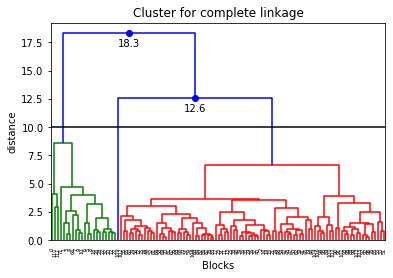

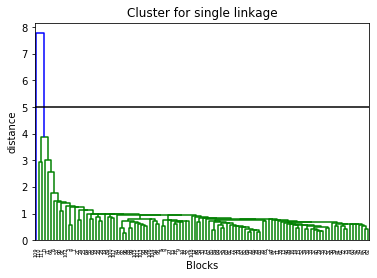

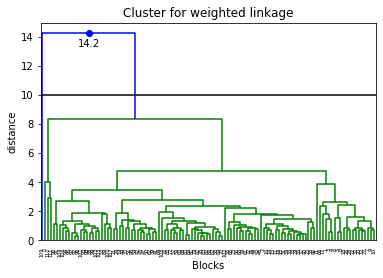

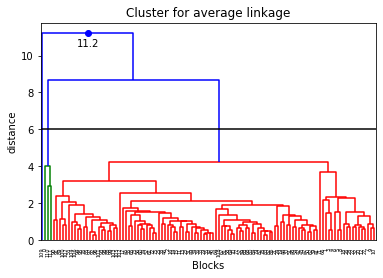

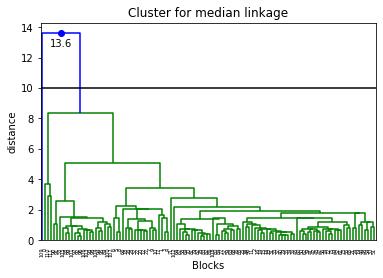

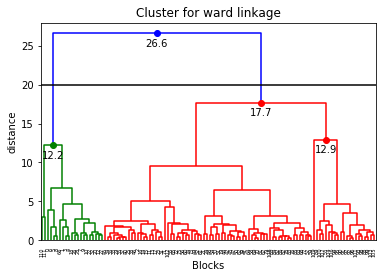

In [15]:
for k,v in d.items():
    Z = linkage(D,method=k)
    fd(Z,leaf_rotation=90.,show_contracted=True,annotate_above=10,max_d=v,)
    plt.title('Cluster for '+k+' linkage')
    plt.xlabel('Blocks')
    plt.show()
    print('\n')

# Clustering based on individual Energy Consumption Measures

=============== complete linkage ===============


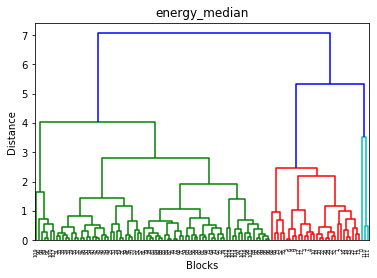

<Figure size 1440x720 with 0 Axes>

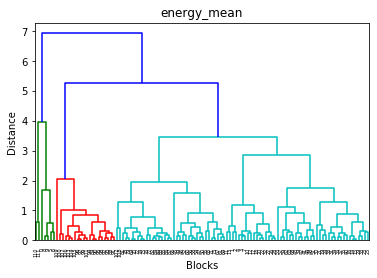

<Figure size 1440x720 with 0 Axes>

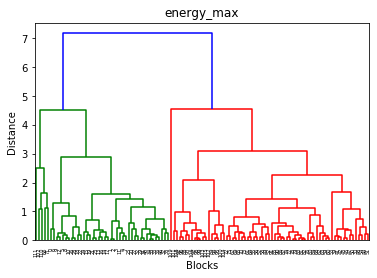

<Figure size 1440x720 with 0 Axes>

C:\Users\Aryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


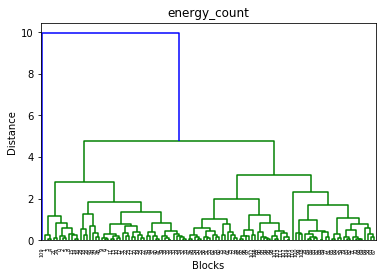

<Figure size 1440x720 with 0 Axes>

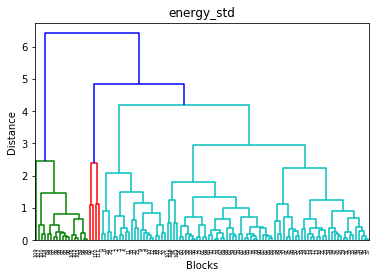

<Figure size 1440x720 with 0 Axes>

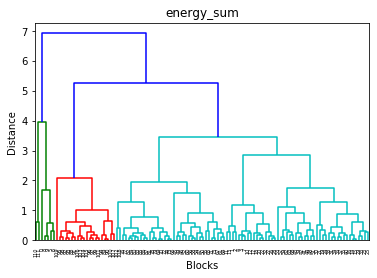

<Figure size 1440x720 with 0 Axes>

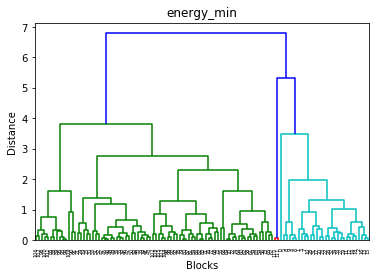

<Figure size 1440x720 with 0 Axes>



=============== single linkage ===============


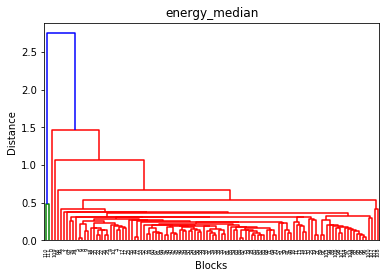

<Figure size 1440x720 with 0 Axes>

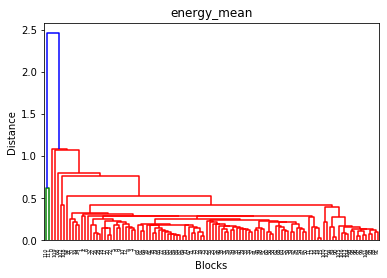

<Figure size 1440x720 with 0 Axes>

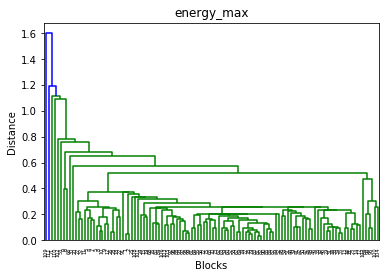

<Figure size 1440x720 with 0 Axes>

C:\Users\Aryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


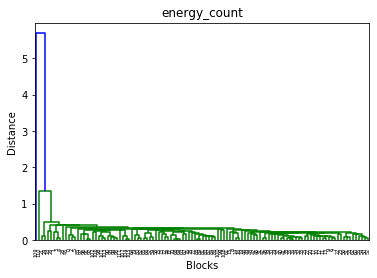

<Figure size 1440x720 with 0 Axes>

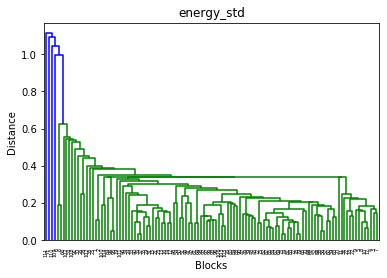

<Figure size 1440x720 with 0 Axes>

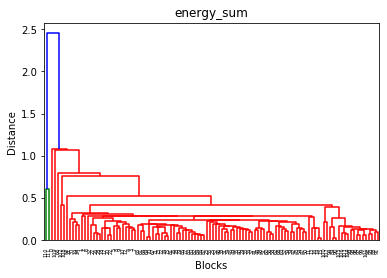

<Figure size 1440x720 with 0 Axes>

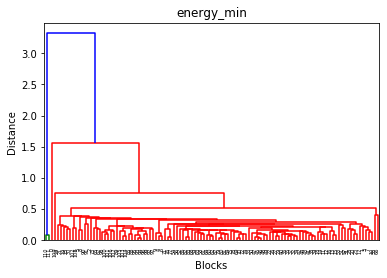

<Figure size 1440x720 with 0 Axes>



=============== weighted linkage ===============


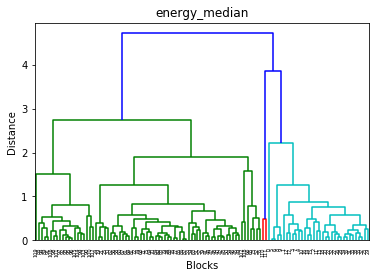

<Figure size 1440x720 with 0 Axes>

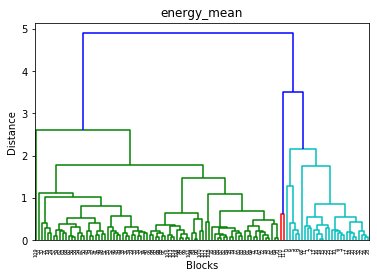

<Figure size 1440x720 with 0 Axes>

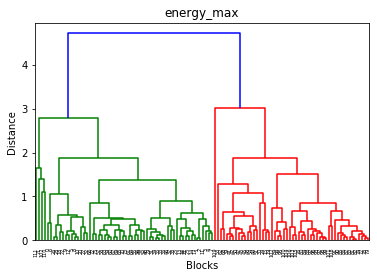

<Figure size 1440x720 with 0 Axes>

C:\Users\Aryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


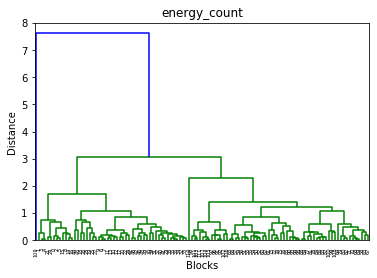

<Figure size 1440x720 with 0 Axes>

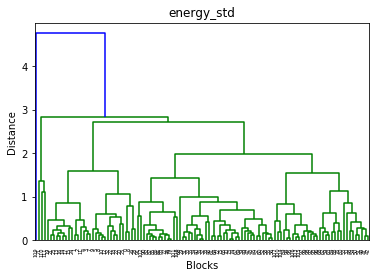

<Figure size 1440x720 with 0 Axes>

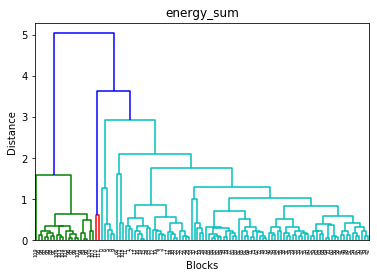

<Figure size 1440x720 with 0 Axes>

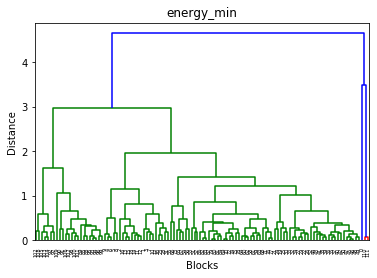

<Figure size 1440x720 with 0 Axes>



=============== average linkage ===============


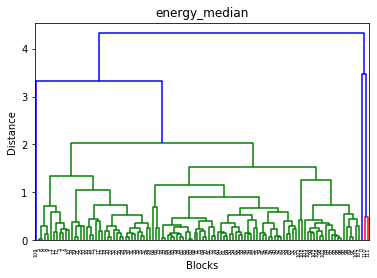

<Figure size 1440x720 with 0 Axes>

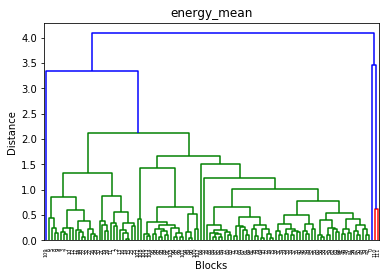

<Figure size 1440x720 with 0 Axes>

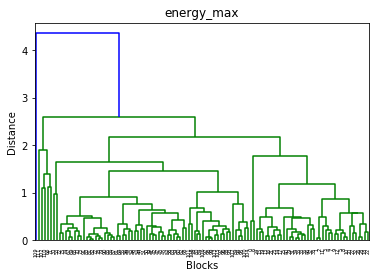

<Figure size 1440x720 with 0 Axes>

C:\Users\Aryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


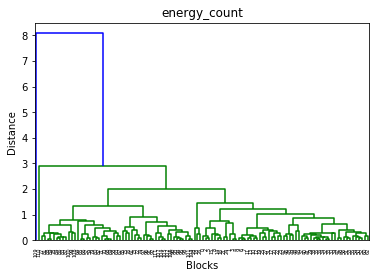

<Figure size 1440x720 with 0 Axes>

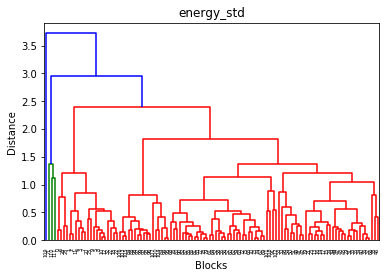

<Figure size 1440x720 with 0 Axes>

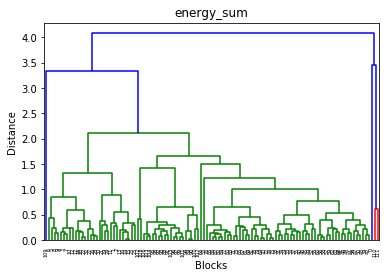

<Figure size 1440x720 with 0 Axes>

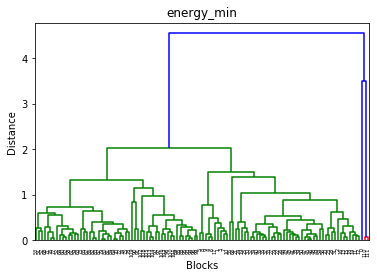

<Figure size 1440x720 with 0 Axes>



=============== median linkage ===============


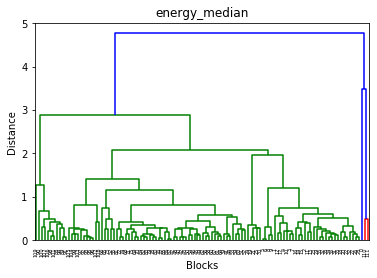

<Figure size 1440x720 with 0 Axes>

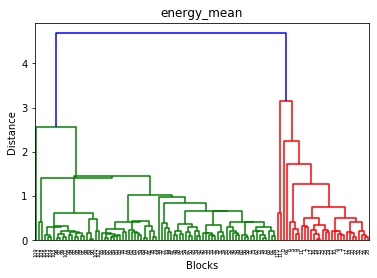

<Figure size 1440x720 with 0 Axes>

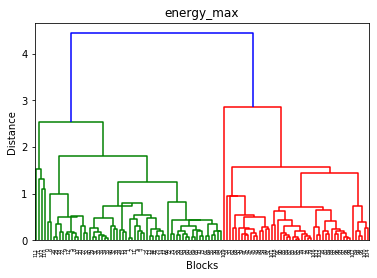

<Figure size 1440x720 with 0 Axes>

C:\Users\Aryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


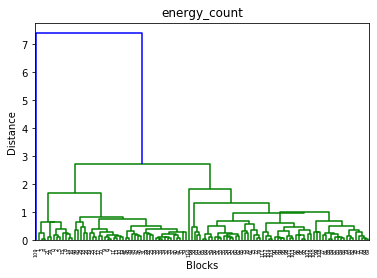

<Figure size 1440x720 with 0 Axes>

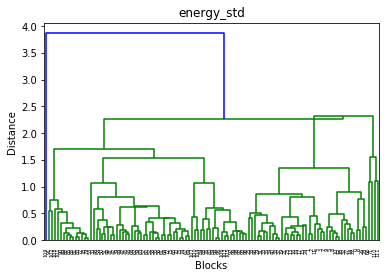

<Figure size 1440x720 with 0 Axes>

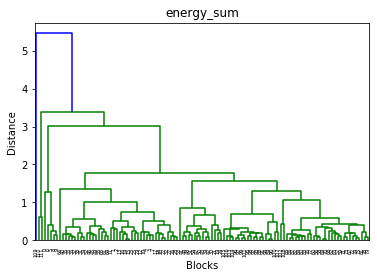

<Figure size 1440x720 with 0 Axes>

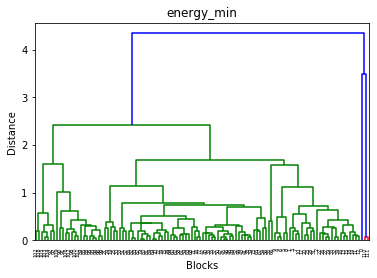

<Figure size 1440x720 with 0 Axes>



=============== ward linkage ===============


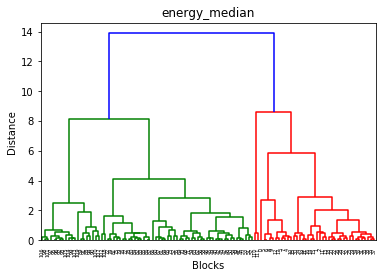

<Figure size 1440x720 with 0 Axes>

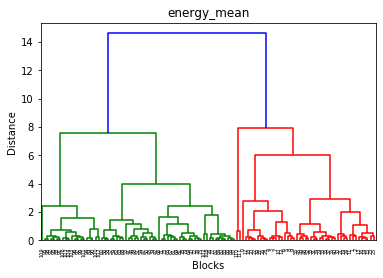

<Figure size 1440x720 with 0 Axes>

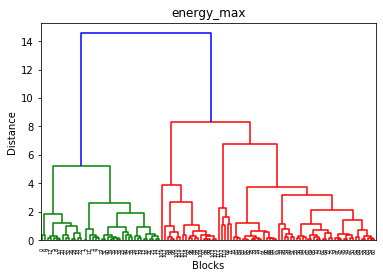

<Figure size 1440x720 with 0 Axes>

C:\Users\Aryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


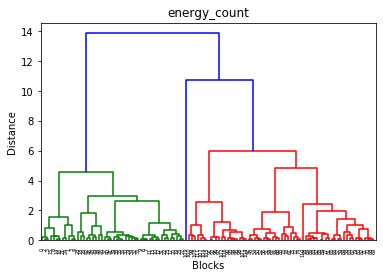

<Figure size 1440x720 with 0 Axes>

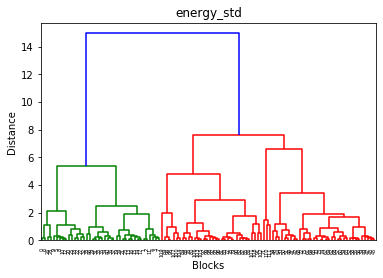

<Figure size 1440x720 with 0 Axes>

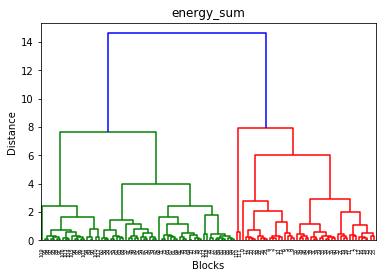

<Figure size 1440x720 with 0 Axes>

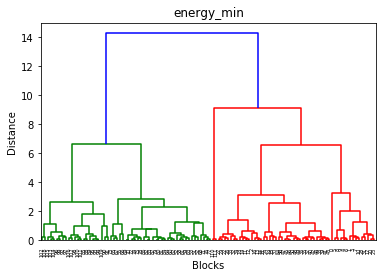

<Figure size 1440x720 with 0 Axes>

In [16]:
for i in l:
    print('='*15+' '+i+' linkage '+'='*15)
    for j in col:
        X = np.column_stack((df['Blocks'],df[j]))
        X = s(X)
        Z = sch.linkage(X,method=i)
        den = sch.dendrogram(Z)
        plt.title(j)
        plt.xlabel('Blocks')
        plt.ylabel('Distance')
        plt.figure(figsize=(20,10))
        plt.show()
    print('='*46) 
    print('\n')